In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from google.colab import files

In [3]:
df = pd.read_csv('/content/drive/My Drive/World Wide Suicide Prediction/master.csv') 
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
#renaming the columns
df.columns=['country','year','gender','age_group','suicide_number','population','sui_pop','country_year','hdi','gdp_for_year','gdp_per_capita','generation']
df.head()

,country,year,gender,age_group,suicide_number,population,sui_pop,country_year,hdi,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


# Data visualization

In [6]:
## Number of suicides in 1985
year_1985 = df[(df['year'] == 1985)]
year_1985 = year_1985.groupby('country')[['suicide_number']].sum().reset_index()

## Sorting values in ascending order
year_1985 = year_1985.sort_values(by='suicide_number', ascending=False)

## Styling output dataframe
year_1985.style.background_gradient(cmap='Purples', subset=['suicide_number'])

,country,suicide_number
46,United States,29446
24,Japan,23257
16,France,12501
41,Sri Lanka,5668
45,United Kingdom,5105
22,Italy,4759
8,Brazil,4228
36,Republic of Korea,3689
10,Canada,3258
43,Thailand,2982


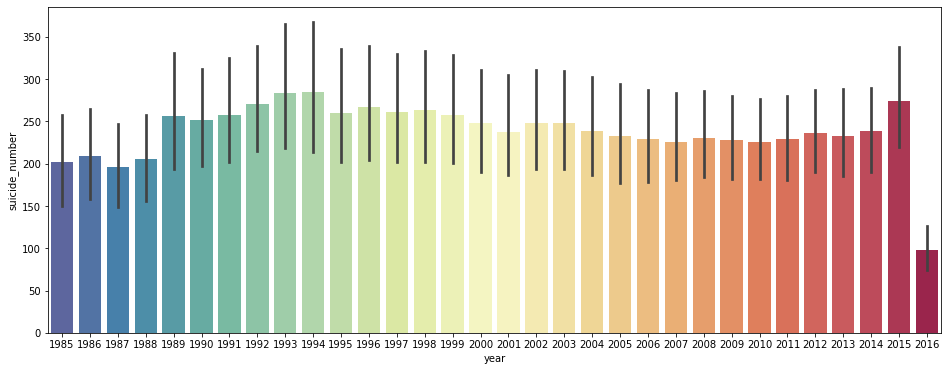

In [ ]:
## Suicides number by year
f,ax = plt.subplots(1,1,figsize=(16,6))
ax = sns.barplot(x = df['year'], y = 'suicide_number',
                data=df, palette='Spectral_r')

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

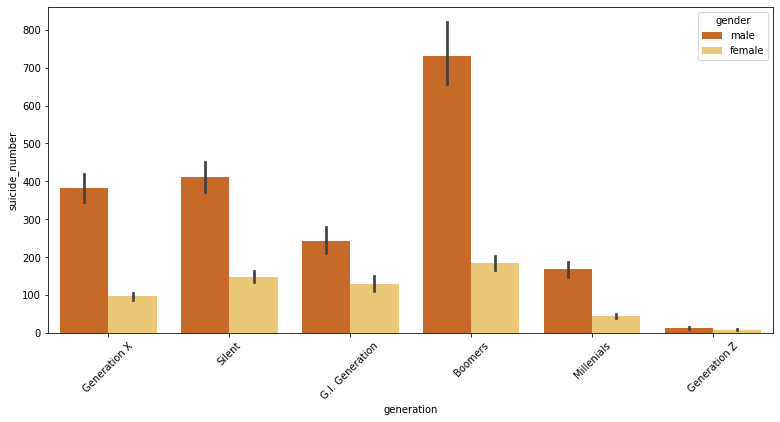

In [7]:
## Suicides number by generation and gender
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['generation'], y = 'suicide_number',
                  hue='gender',data=df, palette='YlOrBr_r')
plt.xticks(rotation=45)

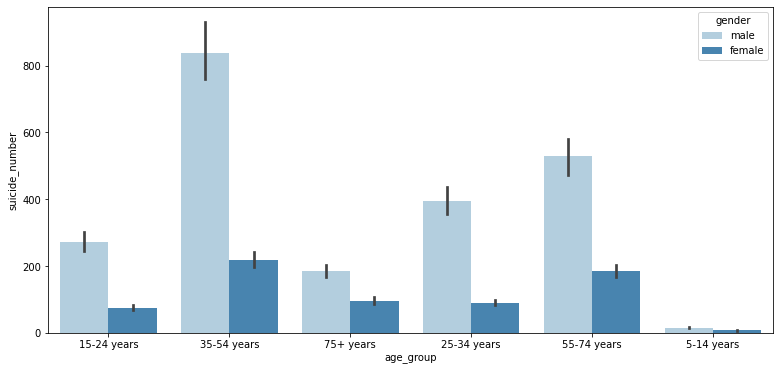

In [8]:
## Suicides number by age and sex
f,ax = plt.subplots(1,1,figsize=(13,6))
ax = sns.barplot(x = df['age_group'], y = 'suicide_number',
                  hue='gender',data=df, palette='Blues')

<Figure size 720x720 with 0 Axes>

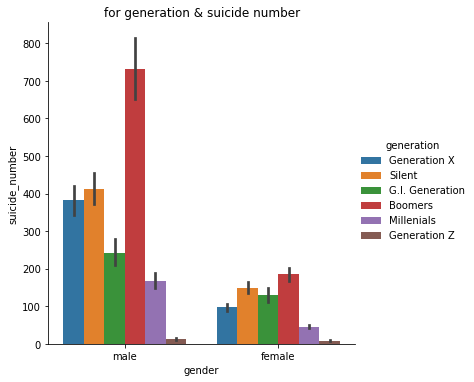

In [9]:
plt.figure(figsize=(10,10))
sns.catplot(x="gender", y="suicide_number",
                 hue="generation",
                 data=df, kind="bar")
plt.title('for generation & suicide number')
plt.show()

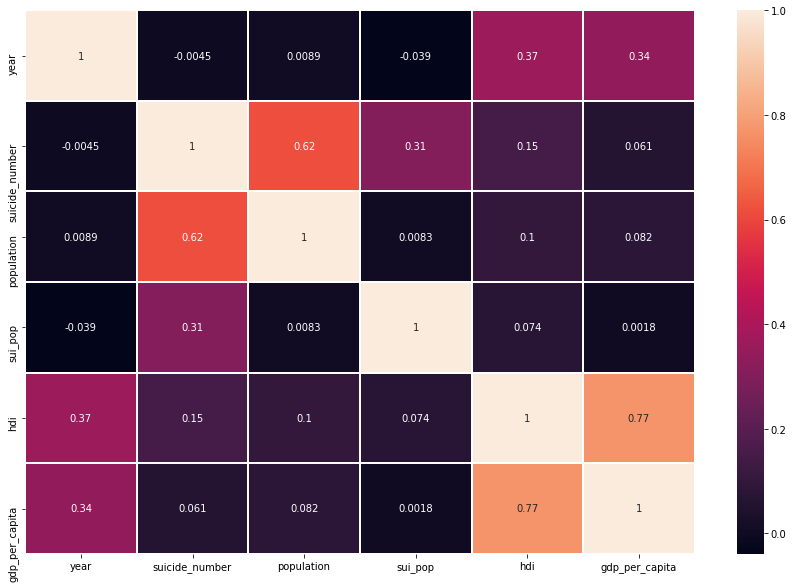

In [10]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values,linecolor='white',linewidth=1)

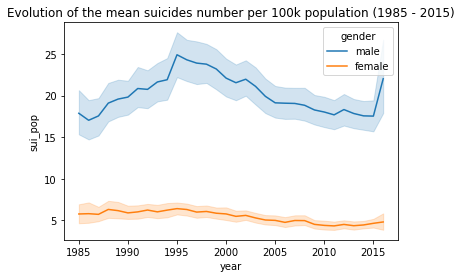

In [11]:
## Mean suicides number by gender and 100k population
df1=df
data = df1.groupby(["year", "gender"]).agg("mean").reset_index()
sns.lineplot(x = "year", y = "sui_pop", hue = "gender", data = df1)
plt.title("Evolution of the mean suicides number per 100k population (1985 - 2015)");

Text(0.5, 0.98, 'Evolution of suicide by sex and age category (1985 - 2015)')

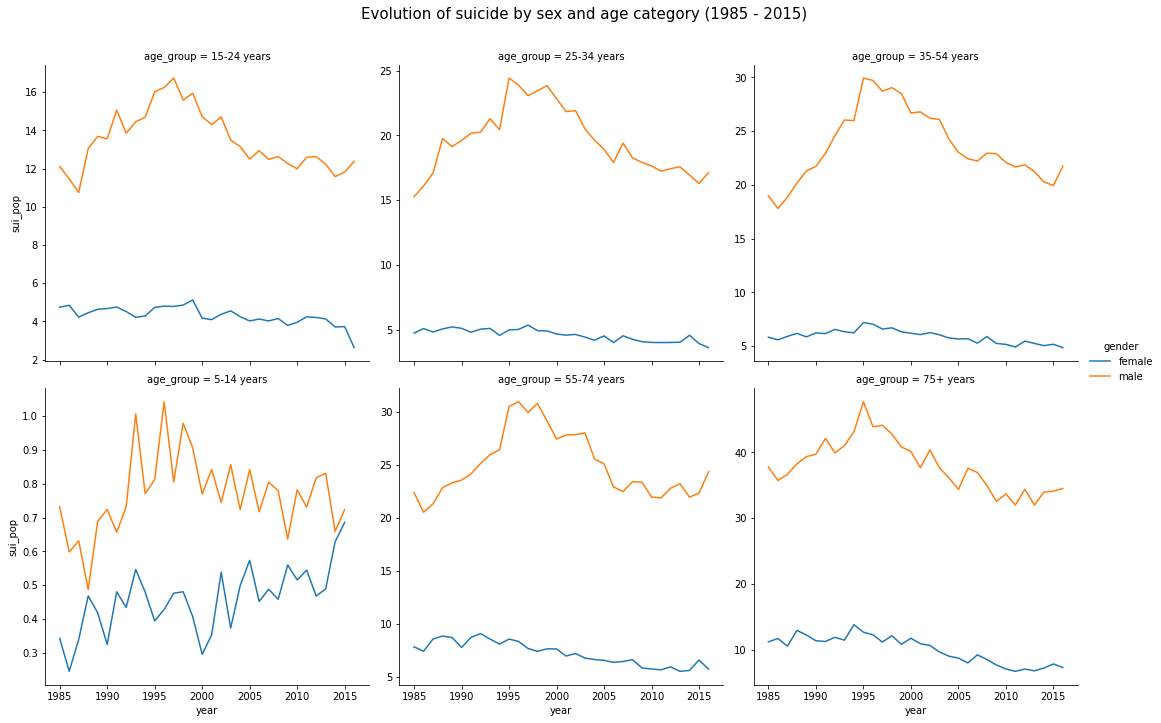

In [12]:
df1 = df1.groupby(["year", "gender", "age_group"]).agg("mean").reset_index()

sns.relplot(x = "year", y = "sui_pop", 
            hue = "gender", col = "age_group", col_wrap = 3, data = df1, 
            facet_kws=dict(sharey=False), kind = "line")
plt.subplots_adjust(top = 0.9)
plt.suptitle("Evolution of suicide by sex and age category (1985 - 2015)", size=15)

###Remove unnecessary columns

In [16]:
#checking if the dataset contains null values
df.isnull().sum().sort_values(ascending=False).head()

hdi               19456
generation            0
gdp_per_capita        0
gdp_for_year          0
country_year          0
dtype: int64

In [17]:
#Remove unnecessary columns
df.drop(["country_year",'hdi','gdp_for_year'],axis=1,inplace=True)
df.head()
#country_year =>Redundant column
#hdi => many NAN values
#gdp_for_year  =>we keep gdp_per_capita

,country,year,gender,age_group,suicide_number,population,sui_pop,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,796,Boomers


In [18]:
#dummies values for sex
sex=pd.get_dummies(df['gender'],drop_first=True)
sex.head()

,male
0,1
1,1
2,0
3,1
4,1


In [19]:
#dummies values for age
age=pd.get_dummies(df['age_group'],drop_first=True)
age.head()

,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
0,0,0,0,0,0
1,0,1,0,0,0
2,0,0,0,0,0
3,0,0,0,0,1
4,1,0,0,0,0


In [20]:
#dummies values for generation
generation=pd.get_dummies(df['generation'],drop_first=True)
generation.head()

,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,0,1,0,0,0
1,0,0,0,0,1
2,0,1,0,0,0
3,1,0,0,0,0
4,0,0,0,0,0


In [21]:
df.drop(['gender','age_group','generation'],axis=1,inplace=True)
df.head()

,country,year,suicide_number,population,sui_pop,gdp_per_capita
0,Albania,1987,21,312900,6.71,796
1,Albania,1987,16,308000,5.19,796
2,Albania,1987,14,289700,4.83,796
3,Albania,1987,1,21800,4.59,796
4,Albania,1987,9,274300,3.28,796


In [22]:
#emerging both the dummies and the dataframe
df=pd.concat([df,sex,age,generation],axis=1)
df

,country,year,suicide_number,population,sui_pop,gdp_per_capita,male,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,Albania,1987,21,312900,6.71,796,1,0,0,0,0,0,0,1,0,0,0
1,Albania,1987,16,308000,5.19,796,1,0,1,0,0,0,0,0,0,0,1
2,Albania,1987,14,289700,4.83,796,0,0,0,0,0,0,0,1,0,0,0
3,Albania,1987,1,21800,4.59,796,1,0,0,0,0,1,1,0,0,0,0
4,Albania,1987,9,274300,3.28,796,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,107,3620833,2.96,2309,0,0,1,0,0,0,0,1,0,0,0
27816,Uzbekistan,2014,9,348465,2.58,2309,0,0,0,0,0,1,0,0,0,0,1
27817,Uzbekistan,2014,60,2762158,2.17,2309,1,0,0,1,0,0,0,0,1,0,0
27818,Uzbekistan,2014,44,2631600,1.67,2309,0,0,0,1,0,0,0,0,1,0,0


In [23]:
le=LabelEncoder()
df['country']=le.fit_transform(df['country'])
df.head()

,country,year,suicide_number,population,sui_pop,gdp_per_capita,male,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,G.I. Generation,Generation X,Generation Z,Millenials,Silent
0,0,1987,21,312900,6.71,796,1,0,0,0,0,0,0,1,0,0,0
1,0,1987,16,308000,5.19,796,1,0,1,0,0,0,0,0,0,0,1
2,0,1987,14,289700,4.83,796,0,0,0,0,0,0,0,1,0,0,0
3,0,1987,1,21800,4.59,796,1,0,0,0,0,1,1,0,0,0,0
4,0,1987,9,274300,3.28,796,1,1,0,0,0,0,0,0,0,0,0


In [24]:
X=df.drop(labels=['suicide_number'],axis=1)
y=df['suicide_number']

#Spliting the data into training and testing set

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
X_test.head()

,country,year,population,sui_pop,gdp_per_capita,male,25-34 years,35-54 years,5-14 years,55-74 years,75+ years,G.I. Generation,Generation X,Generation Z,Millenials,Silent
14975,51,2010,145331,40.60,11951,1,1,0,0,0,0,0,1,0,0,0
9129,33,1988,4362100,13.89,19534,1,0,0,0,0,0,0,1,0,0,0
25972,94,2008,542946,23.94,4368,1,0,0,0,0,0,0,0,0,1,0
2446,8,1998,25583,0.00,26269,0,0,0,0,0,0,0,1,0,0,0
2852,9,2012,237133,4.64,25587,1,1,0,0,0,0,0,0,0,1,0


#Linear Regression

In [26]:
from sklearn.linear_model import LinearRegression 
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_test=lr.predict(X_test)
y_pred_train=lr.predict(X_train)

In [27]:
#evaluate the model
from sklearn.metrics import mean_squared_error,explained_variance_score
mse_test_lr=mean_squared_error(y_test,y_pred_test)
mse_train_lr=mean_squared_error(y_train,y_pred_train)

print("Linear Regression - MSE of the test set  is : " + str(mse_test_lr))
print("Linear Regression - MSE of the training set is : "+str(mse_train_lr))

print("Linear Regression - variance score is : "+ str(explained_variance_score(y_test,y_pred_test)))

Linear Regression - MSE of the test set  is : 478993.3553361628
Linear Regression - MSE of the training set is : 391373.99847588356
Linear Regression - variance score is : 0.46908095635810887


#Decision Tree Regression 

In [28]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred_test=dtr.predict(X_test)
y_pred_train=dtr.predict(X_train)

In [29]:
#evaluate the model
mse_test_dtr=mean_squared_error(y_test,y_pred_test)
mse_train_dtr=mean_squared_error(y_train,y_pred_train)

print("Decision Tree Regression - MSE of the test set is : " + str(mse_test_dtr))
print("Decision Tree Regression - MSE of the training set is : "+str(mse_train_dtr))

print("Decision Tree Regression - variance score is : "+ str(explained_variance_score(y_test,y_pred_test)))

Decision Tree Regression - MSE of the test set is : 12564.895398993529
Decision Tree Regression - MSE of the training set is : 0.0
Decision Tree Regression - variance score is : 0.9860722682065601


#Random forest regression model

In [32]:
from sklearn.ensemble import RandomForestRegressor
rfr= RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train,y_train)
y_pred_test=rfr.predict(X_test)
y_pred_train=rfr.predict(X_train)

In [33]:
#evaluate the model
mse_test_rfr=mean_squared_error(y_test,y_pred_test)
mse_train_rfr=mean_squared_error(y_train,y_pred_train)

print("Random Forest Regression - MSE of the test set is : " + str(mse_test_rfr))
print("Random Forest Regression - MSE of the training set is : "+str(mse_train_rfr))

print("Random Forest Regression - variance score is : "+ str(explained_variance_score(y_test,y_pred_test)))

Random Forest Regression - MSE of the test set is : 5250.217462555626
Random Forest Regression - MSE of the training set is : 416.9963068314163
Random Forest Regression - variance score is : 0.9941822396078536


#Test Random inputs

In [34]:
#predicting
y_pred=rfr.predict(np.expand_dims(np.array([0,1987,312900,6.71,796,1,1,0,0,0,0,0,0,0,0,1]), axis=0))
# print(x_test[0])
print("Number of suicide : ",int(y_pred))

Number of suicide :  21


#Store model in pickle file

In [35]:
#save model to disk
filename='/content/drive/My Drive/World Wide Suicide Prediction/suicide_prediction_model.pkl'
pickle.dump(rfr,open(filename,'wb'))

In [36]:
#load the model from disk
load_model=pickle.load(open(filename,'rb'))
result=load_model.predict(np.expand_dims(np.array([0,1987,312900,6.71,796,1,1,0,0,0,0,0,0,0,0,1]), axis=0))
print("Number of suicide : ",int(result))

Number of suicide :  21


#Comparision of models

In [37]:
train_error=[mse_train_lr,mse_train_dtr,mse_train_rfr]
test_error=[mse_test_lr,mse_test_dtr,mse_train_rfr]

col={'Train Error':train_error,'Test Error':test_error}
models=['Linear Regression','Decision Tree Regression','Random Forest Regression']
comp=pd.DataFrame(data=col,index=models)
comp

,Train Error,Test Error
Linear Regression,391373.998476,478993.355336
Decision Tree Regression,0.000000,12564.895399
Random Forest Regression,416.996307,416.996307


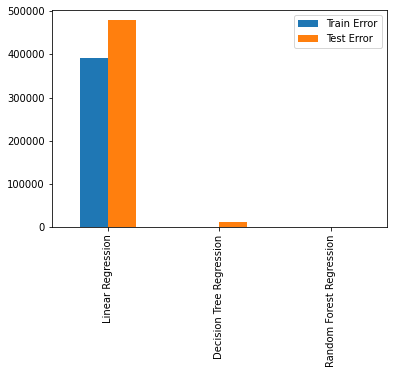

In [38]:
comp.plot(kind='bar')

# GUI Using flask

In [39]:
!pip install flask-ngrok

In [40]:
%mkdir templates -p

In [43]:
%%writefile templates/index.html
<!DOCTYPE html>
<html>

<head>
  <meta charset="UTF-8" />
  <title>Suicide Number Prediction</title>
  <!-- Bootstrap CSS -->
  <link rel="stylesheet" href="https://stackpath.bootstrapcdn.com/bootstrap/4.3.1/css/bootstrap.min.css"
    integrity="sha384-ggOyR0iXCbMQv3Xipma34MD+dH/1fQ784/j6cY/iJTQUOhcWr7x9JvoRxT2MZw1T" crossorigin="anonymous" />
  <link rel="stylesheet" href="./css/global.css" type="text/css">
</head>

<body style="background: linear-gradient(-180deg, rgb(6, 201, 191) 0%, rgb(0, 127, 201) 100%, rgb(3, 86, 154) 50%);
              height: 100%;
              width: 100%;
              background-size: cover;
              background-attachment: fixed;
              background-position: center center;">
  <div class="container">
  <br/>
  <h1 class="text-center">{{ prediction_text }}</h1>
    <h1 class="text-center my-4">Predict Suicide Number</h1>

    <!-- Main Input For Receiving Query to our ML -->
    <form action="{{ url_for('predict')}}" class="mx-auto col-lg-6 col-md-8 col-12" method="post" id="student" style="
            color : #fff;
            background: rgba(255, 255, 255, 0.192);
            padding-top: 20px;
            padding-left:15px;
            padding-right: 15px;
            padding-bottom:10px;
            border-radius: 10px;
            box-shadow: 0px 0px 10px 0px #000;
          ">

      <!-- country -->
      <div class="form-group row">
        <label for="country" class="col-3">Country</label>
        <select class="form-control col-8" name="country" id="country">
          <option selected disabled>Choose...</option>
          <option value="0">Albania</option>
          <option value="1">Antigua and Barbuda</option>
          <option value="2">Argentina</option>
          <option value="3">Armenia</option>
          <option value="4">Aruba</option>
          <option value="5">Australia</option>
          <option value="6">Austria</option>
          <option value="7">Azerbaijan</option>
          <option value="8">Bahamas</option>
          <option value="9">Bahrain</option>
          <option value="10">Barbados</option>
          <option value="11">Belarus</option>
          <option value="12">Belgium</option>
          <option value="13">Belize</option>
          <option value="14">Bosnia and Herzegovina</option>
          <option value="15">Brazil</option>
          <option value="16">Bulgaria</option>
          <option value="17">Cabo Verde</option>
          <option value="18">Canada</option>
          <option value="19">Chile</option>
          <option value="20">Colombia</option>
          <option value="21">Costa Rica</option>
          <option value="22">Croatia</option>
          <option value="23">Cuba</option>
          <option value="24">Cyprus</option>
          <option value="25">Czech Republic</option>
          <option value="26">Denmark</option>
          <option value="27">Dominica</option>
          <option value="28">Ecuador</option>
          <option value="29">El Salvador</option>
          <option value="30">Estonia</option>
          <option value="31">Fiji</option>
          <option value="32">Finland</option>
          <option value="33">France</option>
          <option value="34">Georgia</option>
          <option value="35">Germany</option>
          <option value="36">Greece</option>
          <option value="37">Grenada</option>
          <option value="38">Guatemala</option>
          <option value="39">Guyana</option>
          <option value="40">Hungary</option>
          <option value="41">Iceland</option>
          <option value="42">Ireland</option>
          <option value="43">Israel</option>
          <option value="44">Italy</option>
          <option value="45">Jamaica</option>
          <option value="46">Japan</option>
          <option value="47">Kazakhstan</option>
          <option value="48">Kiribati</option>
          <option value="49">Kuwait</option>
          <option value="50">Kyrgyzstan</option>
          <option value="51">Latvia</option>
          <option value="52">Lithuania</option>
          <option value="53">Luxembourg</option>
          <option value="54">Macau</option>
          <option value="55">Maldives</option>
          <option value="56">Malta</option>
          <option value="57">Mauritius</option>
          <option value="58">Mexico</option>
          <option value="59">Mongolia</option>
          <option value="60">Montenegro</option>
          <option value="61">Netherlands</option>
          <option value="62">New Zealand</option>
          <option value="63">Nicaragua</option>
          <option value="64">Norway</option>
          <option value="65">Oman</option>
          <option value="66">Panama</option>
          <option value="67">Paraguay</option>
          <option value="68">Philippines</option>
          <option value="69">Poland</option>
          <option value="70">Portugal</option>
          <option value="71">Puerto Rico</option>
          <option value="72">Qatar</option>
          <option value="73">Republic of Korea</option>
          <option value="74">Romania</option>
          <option value="75">Russian Federation</option>
          <option value="76">Saint Kitts and Nevis</option>
          <option value="77">Saint Lucia</option>
          <option value="78">Saint Vincent and Grenadines</option>
          <option value="79">San Marino</option>
          <option value="80">Serbia</option>
          <option value="81">Seychelles</option>
          <option value="82">Singapore</option>
          <option value="83">Slovakia</option>
          <option value="84">Slovenia</option>
          <option value="85">South Africa</option>
          <option value="86">Spain</option>
          <option value="87">Sri Lanka</option>
          <option value="88">Suriname</option>
          <option value="89">Sweden</option>
          <option value="90">Switzerland</option>
          <option value="91">Thailand</option>
          <option value="92">Trinidad and Tobago</option>
          <option value="93">Turkey</option>
          <option value="94">Turkmenistan</option>
          <option value="95">Ukraine</option>
          <option value="96">United Arab Emirates</option>
          <option value="97">United Kingdom</option>
          <option value="98">United States</option>
          <option value="99">Uruguay</option>
          <option value="100">Uzbekistan</option>
        </select>
      </div>

      <!-- year -->
      <div class="form-group row">
        <label for="year" class="col-3">Year</label>
        <select class="form-control col-8" name="year" id="year">
          <option selected disabled>Choose...</option>
          <option value="1985">1985</option>
          <option value="1986">1986</option>
          <option value="1987">1987</option>
          <option value="1988">1988</option>
          <option value="1989">1989</option>
          <option value="1990">1990</option>
          <option value="1991">1991</option>
          <option value="1992">1992</option>
          <option value="1993">1993</option>
          <option value="1994">1994</option>
          <option value="1995">1995</option>
          <option value="1996">1996</option>
          <option value="1997">1997</option>
          <option value="1998">1998</option>
          <option value="1999">1999</option>
          <option value="2000">2000</option>
          <option value="2001">2001</option>
          <option value="2002">2002</option>
          <option value="2003">2003</option>
          <option value="2004">2004</option>
          <option value="2005">2005</option>
          <option value="2006">2006</option>
          <option value="2007">2007</option>
          <option value="2008">2008</option>
          <option value="2009">2009</option>
          <option value="2010">2010</option>
          <option value="2011">2011</option>
          <option value="2012">2012</option>
          <option value="2013">2013</option>
          <option value="2014">2014</option>
          <option value="2015">2015</option>
          <option value="2016">2016</option>
          <option value="2017">2017</option>
          <option value="2018">2018</option>
          <option value="2019">2019</option>
          <option value="2020">2020</option>
          <option value="2021">2021</option>        
        </select>
      </div>

      <!-- population -->
      <div class="form-group row">
        <label for="population" class="col-3">Population</label>
        <input type="text" class="form-control col-8" name="population" placeholder="Population" required="required" />
      </div>

      <!-- Age group -->
      <div class="form-group row">
        <label for="ageGroup" class="col-3">Age Group</label>
        <select class="form-control col-8" name="ageGroup" id="ageGroup">
          <option selected disabled>Choose...</option>
          <option value="0">5 to 14 year</option>
          <option value="1">15 to 24 year</option>
          <option value="2">25 to 34 year</option>
          <option value="3">35 to 54 year</option>
          <option value="4">55 to 74 year</option>
          <option value="5">Above 75 year</option>
        </select>
      </div>

      <!-- gender -->
      <div class="form-group row">
        <label for="gender" class="col-3">Gender</label>
        <select class="form-control col-8" name="gender" id="gender">
          <option selected disabled>Choose...</option>
          <option value="1">Male</option>
          <option value="0">Female</option>
        </select>
      </div>

      <!-- Generation -->
      <div class="form-group row">
        <label for="generation" class="col-3">Generation</label>
        <select class="form-control col-8" name="generation" id="generation">
          <option selected disabled>Choose...</option>
          <option value="0">Generation X</option>
          <option value="1">Silent</option>
          <option value="2">G.I. Generation</option>
          <option value="3">Boomers</option>
          <option value="4">Millenials</option>
          <option value="5">Generation Z</option>
        </select>
      </div>

      <!-- Suicide per 100K -->
      <div class="form-group row">
        <label for="sui_pop" class="col-3">Suicide per 100K</label>
        <input type="text" class="form-control col-8" name="sui_pop" placeholder="Suicide per 100K (ex. 6.71)"
          required="required" />
      </div>

      <!-- gdp_per_capita -->
      <div class="form-group row">
        <label for="gdp_per_capita" class="col-3">Gdp per capita</label>
        <input type="text" class="form-control col-8" name="gdp_per_capita" placeholder="Gdp per capita (ex. 796)"
          required="required" />
      </div>

      <button type="submit" style="background-color: rgb(3, 95, 131);"
        class="btn btn-block btn-large mt-4 col-6 text-center mx-auto text-white shadow rounded">
        Predict
      </button>
    </form>

    <br />
    <br />
    
  </div>
</body>

</html>

Overwriting templates/index.html


In [ ]:
# model = pickle.load(open('/content/drive/My Drive/World Wide Suicide Prediction/suicide_prediction_model.pkl', 'rb'))

In [ ]:
import numpy as np
from flask import Flask, request, jsonify, render_template
import pickle
from flask_ngrok import run_with_ngrok

app = Flask(__name__, template_folder='templates')
# app.config["TEMPLATES_AUTO_RELOAD"] = True
model = pickle.load(open('/content/drive/My Drive/World Wide Suicide Prediction/suicide_prediction_model.pkl', 'rb'))
run_with_ngrok(app)

@app.route("/")
def home():
    return render_template('index.html')

@app.route('/predict',methods=['POST'])
def predict():
    int_features = [float(x) for x in request.form.values()]
    
    final_list = []
    final_list.append(int(int_features[0])) # country
    final_list.append(int(int_features[1])) # year
    final_list.append(int(int_features[2])) # population
    final_list.append(int_features[6]) # sui_pop
    final_list.append(int(int_features[7])) # gdp_per_capita
    final_list.append(int(int_features[4])) # gender
    
    age_group = [0, 0, 0, 0, 0] # age group
    val_age_group = int(int_features[3])
    if val_age_group == 0: age_group[2] = 1
    elif val_age_group == 2: age_group[0] = 1 
    elif val_age_group == 3: age_group[1] = 1 
    elif val_age_group == 4: age_group[3] = 1 
    elif val_age_group == 5: age_group[4] = 1 
    else: pass
    final_list.extend(age_group)

    generation = [0, 0, 0, 0, 0] # generation
    val_generation = int(int_features[5])
    if val_generation == 0: generation[1] = 1
    elif val_generation == 1: generation[4] = 1 
    elif val_generation == 2: generation[0] = 1 
    elif val_generation == 4: generation[3] = 1 
    elif val_generation == 5: generation[2] = 1 
    else: pass
    final_list.extend(generation)

    final_features = np.array(final_list)
    final_features = np.expand_dims(final_features, axis=0)
    prediction = model.predict(final_features)
    output = int(prediction[0])

    return render_template('index.html', prediction_text='No of suicide : {}'.format(output))


if __name__ == '__main__':
    app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://4724983ed3c9.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [04/Nov/2020 02:59:56] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2020 02:59:58] "GET /css/global.css HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2020 02:59:59] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2020 03:02:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2020 03:02:04] "GET /css/global.css HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2020 03:02:06] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2020 03:02:43] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2020 03:02:52] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2020 03:03:14] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2020 03:03:15] "GET /css/global.css HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2020 03:03:49] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2020 03:03:49] "GET /css/global.css HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2020 03:03:51] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [04/Nov/2020 03:05:52] "POST /predict HTTP/1.1" 200 -
127.0.0.1 - - [04/Nov/2020 03:05:53] "GET /css/